In [74]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [75]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import statsmodels.api   as sm
import scipy.stats       as stats
import lightgbm          as lgb
import datetime          as dt
import matplotlib
import pydotplus

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


from math                      import sqrt

from sklearn.datasets          import load_boston
from sklearn.model_selection   import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model      import LinearRegression, LogisticRegression
from sklearn.linear_model      import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.linear_model      import ElasticNetCV, ElasticNet
from sklearn.metrics           import mean_squared_error
from sklearn.metrics           import r2_score, roc_auc_score, roc_curve
from sklearn.metrics           import confusion_matrix, accuracy_score, classification_report
from sklearn.tree              import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.externals.six     import StringIO
from sklearn.preprocessing     import StandardScaler
from sklearn.ensemble          import RandomForestClassifier, VotingClassifier
from sklearn.neighbors         import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes       import BernoulliNB
from sklearn.svm               import SVC, SVR
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster           import KMeans, AgglomerativeClustering
from sklearn.feature_selection import RFECV

from collections               import Counter as count

from IPython.display           import Image

from scipy.stats               import randint as sp_randint
from scipy.cluster.hierarchy   import dendrogram, linkage

from statsmodels.stats.outliers_influence import variance_inflation_factor

from imblearn.over_sampling    import SMOTE

from category_encoders         import TargetEncoder

from scipy.stats               import ttest_1samp,ttest_ind, wilcoxon

from statsmodels.stats.power   import ttest_power

from mlxtend.feature_selection import SequentialFeatureSelector as sfs



In [76]:
import os
os.getcwd()

'C:\\Users\\Dell\\Downloads'

# Read the Dataset

In [77]:
data= pd.read_csv("train_file.csv")

In [78]:
data.head()

,ID,UsageClass,CheckoutType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,MaterialType
0,1,Physical,Horizon,2005,4,1,Tidal wave,NaN,"Tsunamis, Tsunamis Juvenile literature",NaN,NaN,BOOK
1,2,Physical,Horizon,2005,4,1,London holiday / Richard Peck.,"Peck, Richard, 1934-",NaN,"Viking,",1998.,BOOK
2,3,Physical,Horizon,2005,4,3,Cinco de Mayo : celebrating Hispanic pride / C...,"Gnojewski, Carol",Cinco de Mayo Mexican holiday History Juvenile...,"Enslow Publishers,",c2002.,BOOK
3,4,Physical,Horizon,2005,4,1,Annapolis,NaN,"War stories, Historical fiction, Domestic fict...",NaN,NaN,BOOK
4,5,Physical,Horizon,2005,4,1,As a man thinketh,NaN,Thought and thinking,NaN,NaN,BOOK


#  What are the number of rows and no. of cols & types of variables (continuous, categorical etc.) 

In [72]:
data.shape

(31653, 12)

In [73]:
categorical = data.select_dtypes ( include = "object" ).columns
print ( "The categorical variables are:\n" , categorical )
print ( "\n" )
continous = data.select_dtypes ( exclude = "object" ).columns
print ( "The continous variables are:\n" , continous )

The categorical variables are:
 Index(['UsageClass', 'CheckoutType', 'Title', 'Creator', 'Subjects',
       'Publisher', 'PublicationYear', 'MaterialType'],
      dtype='object')


The continous variables are:
 Index(['ID', 'CheckoutYear', 'CheckoutMonth', 'Checkouts'], dtype='object')


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 12 columns):
ID                 31653 non-null int64
UsageClass         31653 non-null object
CheckoutType       31653 non-null object
CheckoutYear       31653 non-null int64
CheckoutMonth      31653 non-null int64
Checkouts          31653 non-null int64
Title              31653 non-null object
Creator            8516 non-null object
Subjects           29890 non-null object
Publisher          9737 non-null object
PublicationYear    9722 non-null object
MaterialType       31653 non-null object
dtypes: int64(4), object(8)
memory usage: 2.9+ MB


#  Calculate point summary for numerical variables 

In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,31653.0,15827.00000,9137.578372,1.0,7914.0,15827.0,23740.0,31653.0
CheckoutYear,31653.0,2005.00000,0.000000,2005.0,2005.0,2005.0,2005.0,2005.0
CheckoutMonth,31653.0,4.00000,0.000000,4.0,4.0,4.0,4.0,4.0
Checkouts,31653.0,2.11743,2.629428,1.0,1.0,1.0,2.0,85.0


In [80]:
train_feature = data['Title']
train_label = np.asarray(data['MaterialType'])

In [81]:
train_feature_array = np.asarray(train_feature)
print(train_feature_array[:10])
cv = CountVectorizer()
vectorized_corpus = cv.fit_transform(train_feature_array).toarray()

#vectorized_corpus
print(vectorized_corpus[0])
print(len(vectorized_corpus[0]))

vocab_len = len(vectorized_corpus[0])

['Tidal wave' 'London holiday / Richard Peck.'
 'Cinco de Mayo : celebrating Hispanic pride / Carol Gnojewski.'
 'Annapolis' 'As a man thinketh'
 'Minnie and Moo go dancing / [written and illustrated by] Denys Cazet.'
 'cat who robbed a bank' 'Irwin guide to using the Wall Street journal'
 'Oracle night' '12 haunted episodes']


MemoryError: Unable to allocate 7.66 GiB for an array with shape (31653, 32493) and data type int64

In [82]:
label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(train_label)
label_one_hot_encode = to_categorical(label_encoded)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data = data.apply(LabelEncoder().fit_transform)
data.head()

In [85]:
print(label_one_hot_encode[0])

[1. 0. 0. 0. 0. 0. 0. 0.]


In [86]:
np.unique(label_encoded,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([21707,    94,   347,   165,  1020,  4149,  2751,  1420],
       dtype=int64))

In [87]:
train_feature.shape

(31653,)

# Do variables have missing/null values? 


In [88]:
data.isnull().sum()

ID                     0
UsageClass             0
CheckoutType           0
CheckoutYear           0
CheckoutMonth          0
Checkouts              0
Title                  0
Creator            23137
Subjects            1763
Publisher          21916
PublicationYear    21931
MaterialType           0
dtype: int64

The missing values are present in creator,publisher and publication Year columns.

In [89]:
data1=data

In [90]:
data1.head()

,ID,UsageClass,CheckoutType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,MaterialType
0,1,Physical,Horizon,2005,4,1,Tidal wave,NaN,"Tsunamis, Tsunamis Juvenile literature",NaN,NaN,BOOK
1,2,Physical,Horizon,2005,4,1,London holiday / Richard Peck.,"Peck, Richard, 1934-",NaN,"Viking,",1998.,BOOK
2,3,Physical,Horizon,2005,4,3,Cinco de Mayo : celebrating Hispanic pride / C...,"Gnojewski, Carol",Cinco de Mayo Mexican holiday History Juvenile...,"Enslow Publishers,",c2002.,BOOK
3,4,Physical,Horizon,2005,4,1,Annapolis,NaN,"War stories, Historical fiction, Domestic fict...",NaN,NaN,BOOK
4,5,Physical,Horizon,2005,4,1,As a man thinketh,NaN,Thought and thinking,NaN,NaN,BOOK


Dropping the columns having missing values.

In [91]:
data1.drop(data1.columns[[7,9,10]], axis=1, inplace=True)

In [93]:
data1.columns

Index(['ID', 'UsageClass', 'CheckoutType', 'CheckoutYear', 'CheckoutMonth',
       'Checkouts', 'Title', 'Subjects', 'MaterialType'],
      dtype='object')

In [94]:
data1.head()

,ID,UsageClass,CheckoutType,CheckoutYear,CheckoutMonth,Checkouts,Title,Subjects,MaterialType
0,1,Physical,Horizon,2005,4,1,Tidal wave,"Tsunamis, Tsunamis Juvenile literature",BOOK
1,2,Physical,Horizon,2005,4,1,London holiday / Richard Peck.,NaN,BOOK
2,3,Physical,Horizon,2005,4,3,Cinco de Mayo : celebrating Hispanic pride / C...,Cinco de Mayo Mexican holiday History Juvenile...,BOOK
3,4,Physical,Horizon,2005,4,1,Annapolis,"War stories, Historical fiction, Domestic fict...",BOOK
4,5,Physical,Horizon,2005,4,1,As a man thinketh,Thought and thinking,BOOK


In subject column having the less missing value.So we have used forward fillna method to fill the NAN value in Subject column.

In [95]:
new_data=data1.fillna(method="ffill")
new_data

,ID,UsageClass,CheckoutType,CheckoutYear,CheckoutMonth,Checkouts,Title,Subjects,MaterialType
0,1,Physical,Horizon,2005,4,1,Tidal wave,"Tsunamis, Tsunamis Juvenile literature",BOOK
1,2,Physical,Horizon,2005,4,1,London holiday / Richard Peck.,"Tsunamis, Tsunamis Juvenile literature",BOOK
2,3,Physical,Horizon,2005,4,3,Cinco de Mayo : celebrating Hispanic pride / C...,Cinco de Mayo Mexican holiday History Juvenile...,BOOK
3,4,Physical,Horizon,2005,4,1,Annapolis,"War stories, Historical fiction, Domestic fict...",BOOK
4,5,Physical,Horizon,2005,4,1,As a man thinketh,Thought and thinking,BOOK
...,...,...,...,...,...,...,...,...,...
31648,31649,Physical,Horizon,2005,4,2,California camping,"California Guidebooks, Camp sites facilities e...",BOOK
31649,31650,Physical,Horizon,2005,4,5,silent world of Nicholas Quinn,Morse Inspector Fictitious character Drama,VIDEOCASS
31650,31651,Physical,Horizon,2005,4,12,big Lebowski,"Video recordings for the hearing impaired, Fea...",VIDEODISC
31651,31652,Physical,Horizon,2005,4,4,"Fables. [3], Storybook love / Bill Willingham,...","Fairy tales Comic books strips etc, Graphic no...",BOOK


In [96]:
data1.describe()

,ID,CheckoutYear,CheckoutMonth,Checkouts
count,31653.000000,31653.0,31653.0,31653.000000
mean,15827.000000,2005.0,4.0,2.117430
std,9137.578372,0.0,0.0,2.629428
min,1.000000,2005.0,4.0,1.000000
25%,7914.000000,2005.0,4.0,1.000000
50%,15827.000000,2005.0,4.0,1.000000
75%,23740.000000,2005.0,4.0,2.000000
max,31653.000000,2005.0,4.0,85.000000


As we can see many outliers present in dataset,so we are using IQR method to remove the outliers.

In [97]:
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ID               15826.0
CheckoutYear         0.0
CheckoutMonth        0.0
Checkouts            1.0
dtype: float64


In [98]:
print(data1 < (Q1 - 1.5 * IQR)) |(data1 > (Q3 + 1.5 * IQR))


       CheckoutMonth  CheckoutType  CheckoutYear  Checkouts     ID  \
0              False         False         False      False  False   
1              False         False         False      False  False   
2              False         False         False      False  False   
3              False         False         False      False  False   
4              False         False         False      False  False   
...              ...           ...           ...        ...    ...   
31648          False         False         False      False  False   
31649          False         False         False      False  False   
31650          False         False         False      False  False   
31651          False         False         False      False  False   
31652          False         False         False      False  False   

       MaterialType  Subjects  Title  UsageClass  
0             False     False  False       False  
1             False     False  False       False  
2     

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [99]:
print(data1['ID'].skew())


0.0


In [100]:
data1['ID'].describe()


count    31653.000000
mean     15827.000000
std       9137.578372
min          1.000000
25%       7914.000000
50%      15827.000000
75%      23740.000000
max      31653.000000
Name: ID, dtype: float64

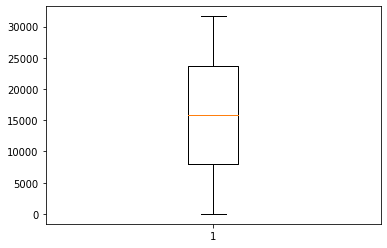

In [101]:
plt.boxplot(data1["ID"])
plt.show()

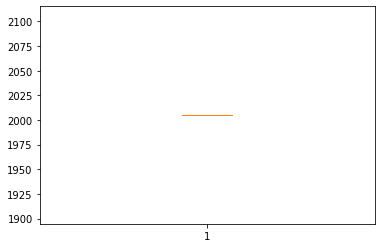

In [102]:
plt.boxplot(data1["CheckoutYear"])
plt.show()

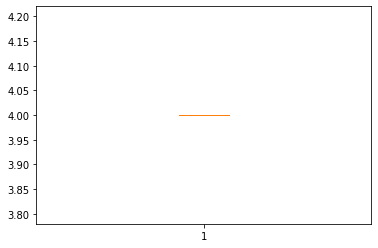

In [103]:
plt.boxplot(data1["CheckoutMonth"])
plt.show()


After the treatment with skewness ,from the boxplot we can see there is no outliers present in ID and CheckoutMonth columns.

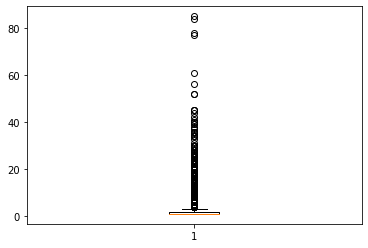

In [50]:
plt.boxplot(data1["Checkouts"])
plt.show()


From this boxplot we can see there are many outliers in Checkouts column.

In [104]:
print(data1['Checkouts'].quantile(0.10))
print(data1['Checkouts'].quantile(0.90))


1.0
4.0


In [105]:
data1["Checkouts"] = np.where(data1["Checkouts"] <1.0, 1.0,data1['Checkouts'])
data1["Checkouts"] = np.where(data1["Checkouts"] >4.0, 4.0,data1['Checkouts'])
print(data1['Checkouts'].skew())

1.1332343900720772


# Logistics Regression


from our dataset as we can see there are many dependent and independent categoriacal variables are present.so we can apply logistic regression to fit our model.

In [61]:
#Extracting Independent and dependent Variable  
x= data1.iloc[:, [6,7]].values  
y= data1.iloc[:, 8].values 

In [62]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [ ]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

In [ ]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

In [65]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,  
                   intercept_scaling=1, l1_ratio=None, max_iter=100,  
                   multi_class='warn', n_jobs=None, penalty='l2',  
                   random_state=0, solver='warn', tol=0.0001, verbose=0,  
                   warm_start=False)  


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [106]:
from keras.models import Model
from keras.layers import Dense
from keras.models import Sequential

In [107]:
model = Sequential()
model.add(Dense(32,activation='relu',input_shape=(33,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(8,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1088      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
Total params: 2,408
Trainable params: 2,408
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_val = vectorized_corpus[:100]
x_train_new = vectorized_corpus[100:]
x_val.shape

In [ ]:
y_val = label_one_hot_encode[:100]
y_train_new = label_one_hot_encode[100:]
y_val.shape

In [ ]:
hist = model.fit(x_train_new,y_train_new,epochs=10,batch_size=256,validation_data=(x_val,y_val))

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],c='r')

In [ ]:
aa=(np.asarray(x_val[0]))
print(aa.shape)

In [ ]:
model.evaluate(x_val,y_val)

In [ ]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'],c='r')

In [108]:
import os
os.getcwd()

'C:\\Users\\Dell\\Downloads'

In [109]:
dft = pd.read_csv("test_file.csv")
dft.head()

,ID,UsageClass,CheckoutType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear
0,31654,Physical,Horizon,2005,4,1,Footprints at the window,NaN,"England Fiction, Space and time Fiction",NaN,NaN
1,31655,Physical,Horizon,2005,4,2,Seven brides for seven brothers,NaN,"Video recordings for the hearing impaired, Mus...",NaN,NaN
2,31656,Physical,Horizon,2005,4,2,History [sound recording] / Loudon Wainwright ...,"Wainwright, Loudon, III, 1946-",Popular music 1991 2000,"Charisma,",p1992.
3,31657,Physical,Horizon,2005,4,2,Doing big business on the internet,NaN,"Internet, Internet advertising, Information ne...",NaN,NaN
4,31658,Physical,Horizon,2005,4,2,Lets learn how to dance shag,NaN,"Shag Dance, Ballroom dancing",NaN,NaN


In [110]:
test_features = dft['Title']

In [111]:
vectorized_corpus_test = cv.transform(test_features).toarray()

In [112]:
vectorized_corpus_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [113]:
#vectorized_corpus
print(vectorized_corpus_test[0])
print(len(vectorized_corpus_test[0]))

vocab_len = len(vectorized_corpus_test[0])

[0 0 0 ... 0 0 0]
32493


In [ ]:
y_result = model.predict(vectorized_corpus_test)

In [ ]:
y_result_label=[]
for y in y_result:
    #print(y)
    #print(np.argmax(y))
    y_result_label.append(np.argmax(y))
print(y_result_label)

In [ ]:
label_encoder.classes_[7]

In [ ]:
y_result_label_final=[]
for y in y_result_label:
    y_result_label_final.append(label_encoder.classes_[y])
   